In [1]:
import load_month
loader = load_month.TripsLoader()

In [2]:
# Загрузите агрегированные данные о поездках в мае 2016. 
df = loader(2016, 5)

In [3]:
df.head()

pickup_region,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Просуммируйте общее количество поездок такси из каждой географической зоны
sum_df = df.sum()
sum_df.head()

pickup_region
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import os
import gmaps

In [6]:
# Посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.
print(np.sum(sum_df == 0))

1283


/Users/ekascheev/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/ekascheev/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


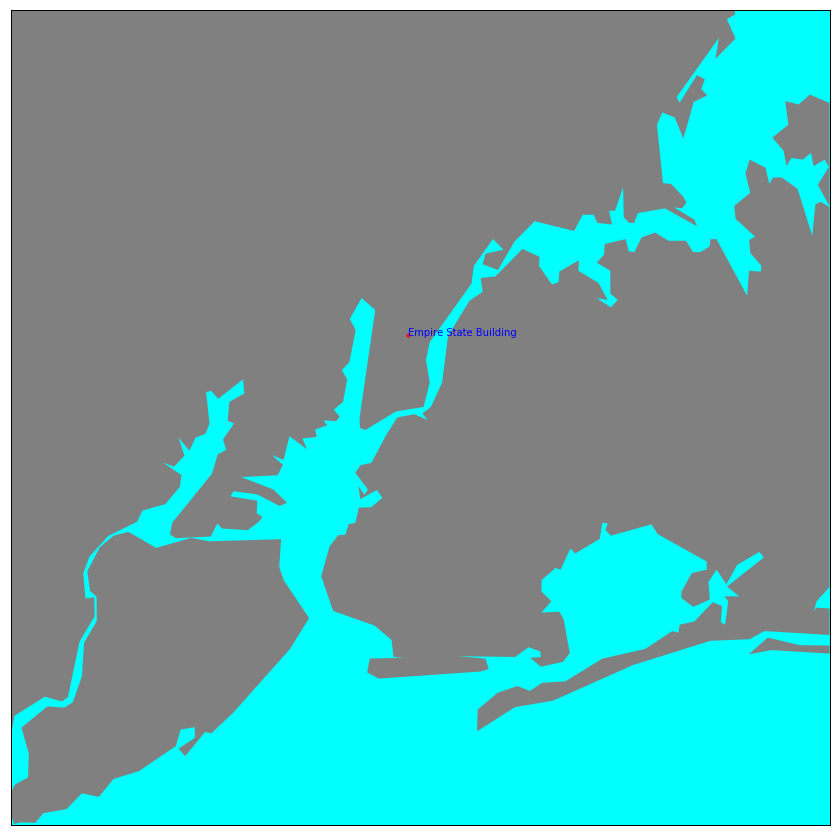

In [7]:
# Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
west, south, east, north = loader.get_coords()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplots(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
m.fillcontinents(color='gray',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
x, y = m(-73.9857, 40.7484)
plt.annotate('Empire State Building', xy=(x, y),  xycoords='data',
             color='b')
plt.plot(x, y, marker='o', markersize=3, color="red")
plt.show()

/Users/ekascheev/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/ekascheev/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


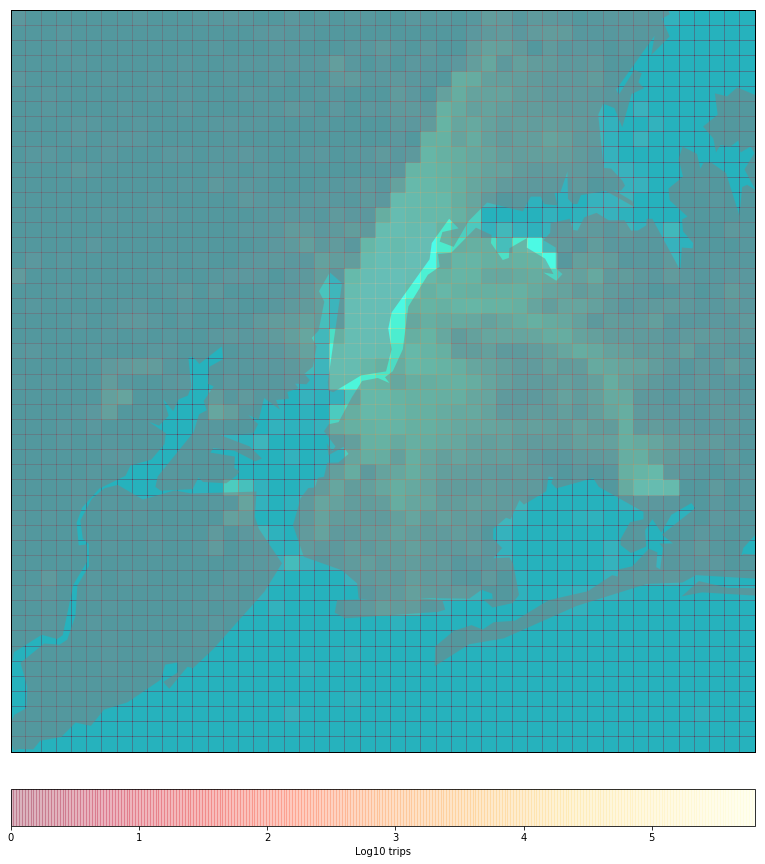

In [8]:
# Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала,
# в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
m.fillcontinents(color='gray',lake_color='aqua', alpha = 0.5)
m.drawmapboundary(fill_color='aqua')
lon = np.linspace(west, east, 50)
lat = np.linspace(south, north, 50)
x, y = m(lon, lat)

#m.pcolormesh(x, y, sum_df.values.reshape((50,50)).T, cmap=cm.YlOrRd_r, alpha = 0.5)
pc = m.pcolormesh(x, y, np.log10(sum_df.values + 1.).reshape((50,50)).T, cmap=cm.YlOrRd_r, alpha = 0.3)
cbar = m.colorbar(pc,location='bottom',pad="5%")
cbar.set_label('Log10 trips')

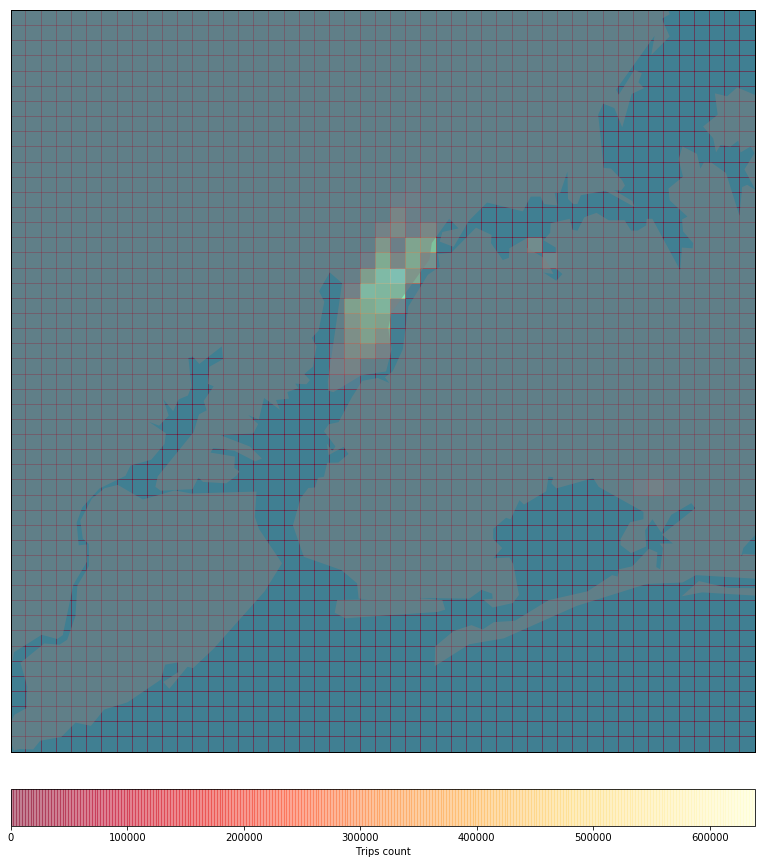

In [9]:
# тоже самое но с линейной шкалой
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
m.fillcontinents(color='gray',lake_color='aqua', alpha = 0.5)
m.drawmapboundary(fill_color='aqua')
lon = np.linspace(west, east, 50)
lat = np.linspace(south, north, 50)
x, y = m(lon, lat)

pc = m.pcolormesh(x, y, sum_df.values.reshape((50,50)).T, cmap=cm.YlOrRd_r, alpha = 0.5)
#pc = m.pcolormesh(x, y, np.log10(sum_df.values + 1.).reshape((50,50)).T, cmap=cm.YlOrRd_r, alpha = 0.3)
cbar = m.colorbar(pc,location='bottom',pad="5%")
cbar.set_label('Trips count')

In [10]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [11]:
# Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать.
# Поставьте метку там, где находится статуя свободы.
new_york_coordinates = ( (south + north) / 2., (west + east) / 2.)
figure_layout = {
    'width': '850px',
    'height': '850px',
    'border': '1px solid black',
    'padding': '1px'
}

markers = [
    {'name': 'Statue of Liberty National Monument', 'location': (40.6893, -74.0445), 'active_reactors': 1}
]

locations = [marker['location'] for marker in markers]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
</dl>
"""
marker_info = [info_box_template.format(**marker) for marker in markers]

marker_layer = gmaps.marker_layer(locations, info_box_content=marker_info)
fig = gmaps.figure(center=new_york_coordinates, zoom_level=10,
             layout = figure_layout)
fig.add_layer(marker_layer)
fig
# Проблемы с отображением? Откройте файл  map1

A Jupyter Widget

In [12]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('map1.html', views=[fig], title='Widgets export')

In [13]:
avg_df = df.mean()

In [14]:
import pandas as pd
reg = pd.read_csv('regions.csv', sep=';')

In [15]:
# Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час.
# Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.
reg['lon'] = (reg.west + reg.east) / 2.
reg['lat'] = (reg.south + reg.north) / 2.
reg['avg'] = avg_df
locations = reg[reg.avg >= 5.][['lat', 'lon']]
weights = reg[reg.avg >= 5.]['avg']
print('5+ trips per hour: {}'.format(locations.shape[0]))

5+ trips per hour: 102


In [16]:
# Нарисуйте на интерактивной карте Нью-Йорка ячейки так,
# чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.
figure_layout = {
    'width': '850px',
    'height': '850px',
    'border': '1px solid black',
    'padding': '1px'
}



fig = gmaps.figure(center=new_york_coordinates, zoom_level=11,
                   layout = figure_layout)
heatmap = gmaps.heatmap_layer(locations, weights=weights,
                              max_intensity = 9.,
                              point_radius = 10)
fig.add_layer(heatmap)
fig
# Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.
# Проблемы с отображением? Откройте файл  map2

A Jupyter Widget

In [17]:
embed_minimal_html('map2.html', views=[fig], title='Widgets export')